In [47]:
# Herramientas para trabajar Data

import pandas as pd
import numpy as np
import os

# Herramientas de Visualizacion

import matplotlib.pyplot as plt

## **Funciones para reportes**
Estas funciones seran utilizadas para darnos un primer paneo general de la calidad de nuestros datos.

Nos van a permitir ver el porcentaje de Valores Faltanes, Valores sin Errores y Outliers para cada una de las tablas o columnas.

In [48]:
# Funcion para el analisis por columna
def ReportePorColumna (DF) :
    for column in DF :
        if DF[column].dtype == 'O':
            # Al no ser un tipo INT, fijamos la cantidad de Outliers a 0
            Outliers = 0
            # Calculamos el porcentaje de valores faltantes
            Faltantes = (DF[column].isnull().sum() / len(DF)) * 100
            Faltantes = round(Faltantes, 2)
            # Calculamos el porcentaje de valores sin Errores
            SinErrores = (100 - Faltantes)
            SinErrores = round(SinErrores, 2)
        else :
            # Si es de un tipo entero, calculamos los Outliers
            minOutlier = (DF[column].mean() - (3 * DF[column].std())) # Valor minimo Outlier
            maxOutlier = (DF[column].mean() + (3 * DF[column].std())) # Valor maximo Outlier
            # Usamos una mascara para filtrar los valores que son Outliers
            Outliers = (((DF[column][DF[column] < minOutlier].count() + DF[column][DF[column] > maxOutlier].count())) * 100) / DF[column].count()
            Outliers = round(Outliers, 2)
            # Calculamos el porcentaje de valores faltantes
            Faltantes = (DF[column].isnull().sum() / len(DF)) * 100
            Faltantes = round(Faltantes, 2)
            # Calculamos el porcentaje de valores Sin Errores
            SinErrores = (100 - Faltantes - Outliers)
            SinErrores = round(SinErrores, 2)
           
        Lista = [Outliers, Faltantes, SinErrores]
        
        # Graficamos el barplot
        plt.figure(figsize=(8,8))
        plt.title('Reporte de '+column)
        graph = plt.bar(['Outliers','Faltantes','Sin Errores'], Lista)
        graph[0].set_color('black')
        graph[1].set_color('r')
        graph[2].set_color('b')
        i = 0
        for p in graph:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            plt.text(x+width/2,
                     y+height*1.01,
                     str(Lista[i])+'%',
                     ha = 'center',
                     weight='bold')
            i+=1
            
        plt.show()
        
        # Imprimimos por pantalla los resultados obtenidos
        
        print('El porcentaje de valores faltantes para la columna',column,'es de:',Faltantes)
        print('El porcentaje de valores sin errores para la columna',column,'es de:',SinErrores)
        print('El porcentaje de outliers para la columna',column,'es de:',Outliers)
        print('---------------------------------------------------------------------------------')

# Funcion para el analisis general de la tabla
def ReporteGeneral(DF) : 
    
    OutliersTotal = []
    count = 0
    
    FaltantesTotal = DF.isnull().sum()
    FaltantesTotal = (FaltantesTotal.sum() / (len(DF)*DF.shape[1])) * 100
    FaltantesTotal = round(FaltantesTotal, 2)

    for column in DF:
        Outliers = []
        if DF[column].dtype == 'O':
            Outliers = Outliers.append(0)
            count += 1
        else :
            minOutlier = (DF[column].mean() - (3 * DF[column].std())) # Valor minimo Outlier
            maxOutlier = (DF[column].mean() + (3 * DF[column].std())) # Valor maximo Outlier
            Outliers = (((DF[column][DF[column] < minOutlier].count() + DF[column][DF[column] > maxOutlier].count())) * 100) / DF[column].count()
            OutliersTotal.append(Outliers)
            count += 1
    
    OutliersTotal = np.array(OutliersTotal)       
    OutliersTotal = OutliersTotal.sum()/count
    OutliersTotal = round(OutliersTotal, 2)
    
    SinErroresTotal = 100 - FaltantesTotal - OutliersTotal
    SinErroresTotal = round(SinErroresTotal, 2)
    
    ListaTotal = [OutliersTotal, FaltantesTotal, SinErroresTotal]
    
    # Graficamos el barplot
    plt.figure(figsize=(8,8))
    plt.title('Reporte General de la Tabla '+DF.name)
    graph = plt.bar(['Outliers','Faltantes','Sin Errores'], ListaTotal)
    graph[0].set_color('black')
    graph[1].set_color('r')
    graph[2].set_color('b')
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                y+height*1.01,
                str(ListaTotal[i])+'%',
                ha = 'center',
                weight='bold')
        i+=1
            
    plt.show()

    print('El porcentaje de valores faltantes para la tabla es de:',FaltantesTotal)
    print('El porcentaje de valores sin errores para la tabla es de:',SinErroresTotal)
    print('El porcentaje de outliers para la tabla es de:',OutliersTotal)
    print('---------------------------------------------------------------------------------')

# **Funciones para el ETL**

Estas funciones seran utilizadas para realizar tanto una limpieza como normalizacion de nuestros datos.

In [49]:
# Esta funcion se encargara de ejecutar el resto de funciones para realizar todo el proceso de ETL del DataFrame que le pasemos.
def ETL(DF):
    ETL_EliminarColumna(DF)
    ETL_ReemplazarNulos(DF)
    ETL_EliminarDuplicados(DF)
    ETL_NormalizarEnteros(DF)
    ETL_NormalizarDecimales(DF)

# Esta funcion nos permite eliminar una columna que se encuentre con muchos valores faltantes.
def ETL_EliminarColumna(DF):
    for column in DF:
        Faltantes = (DF[column].isnull().sum() / len(DF)) * 100
        Faltantes = round(Faltantes, 2)
        if Faltantes >= 100:
            DF.drop(columns=column, inplace= True)
    return DF

# Esta funcion nos va a permitir reemplazar los valores nulos del DataFrame. 
def ETL_ReemplazarNulos(DF):
    for column in DF:
        if DF[column].dtype == 'O':
            DF[column].fillna(value = 'Sin Datos', inplace= True)
        else:
            DF[column].fillna(value = 0, inplace= True)
    return DF.isnull().sum()

# Esta funcion se encarga de eliminar los valores duplicados del DataFrame.      
def ETL_EliminarDuplicados(DF):
    
    DF.drop_duplicates(inplace= True)
    
    return DF

# Esta funcion nos permitira normalizar todos los floats.
def ETL_NormalizarDecimales(DF):
    for column in DF:
        if DF[column].dtype in ['int64', 'int32']:
            pass
        else:
            try:
                DF[column] = DF[column].astype('float64')
            except:
                pass

# Esta funcion nos permitira normalizar todos los ints.
def ETL_NormalizarEnteros(DF):
    def entero(DF):
        for i in DF:
            if i == int(i):
                pass
            else:
                return False
        return True
    
    for i in DF:
        if DF[i].dtype == "float64":
            if entero(DF[i]):
                DF[i] = DF[i].astype(int)
        else:
            pass

# Esta funcion nos permitira ver el reporte de los datos, hacer el proceso de ETL y exportar a CSV.
def Export(directorio,trabajado):

    lista_csv = os.listdir(directorio)

    # Recorremos la lista generada para realizar distintas acciones en los archivos del directorio
    for nombre_csv in lista_csv:
        # Generamos los DF
        print('Trabajando el archivo: ', nombre_csv)
        DF = pd.read_csv(directorio+'%s' % nombre_csv)
        DF.name = nombre_csv
        
        # Mostramos un reporte de calidad del DF
        print('Reporte de calidad de datos: ')
        ReporteGeneral(DF)
        print('--------------------------------------------')
        
        # Normalizamos
        ETL(DF)
        print('Proceso de ETL realizado!')
        print('--------------------------------------------')

        # Mostramos un reporte posterior al proceso de ETL
        print('Este es el nuevo estado de los datos')
        ReporteGeneral(DF)
        print('--------------------------------------------')
        
        # Generamos metadata de las columnas para evitar errores con los indices
        lista_header = DF.columns
        lista_header = lista_header.tolist()

        # Exportamos csvs en un directorio especificado
        DF.to_csv(trabajado+'%s' % nombre_csv, index = False, header = lista_header)

Por favor ingrese el directorio de la data que desea trabajar: 
Por favor ingrese el directorio donde desea guardar los nuevos CSVs trabajados: 
Trabajando el archivo:  olist_closed_deals_dataset.csv
Reporte de calidad de datos: 


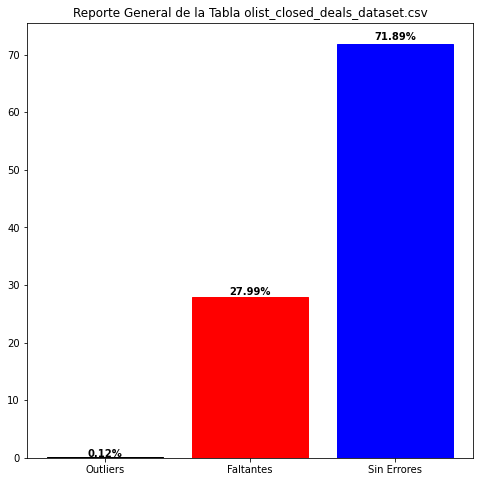

El porcentaje de valores faltantes para la tabla es de: 27.99
El porcentaje de valores sin errores para la tabla es de: 71.89
El porcentaje de outliers para la tabla es de: 0.12
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


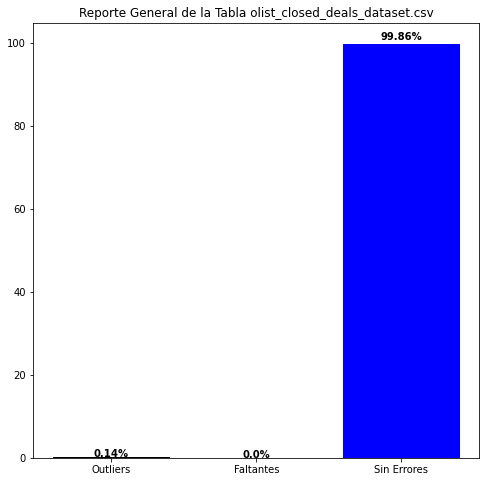

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 99.86
El porcentaje de outliers para la tabla es de: 0.14
---------------------------------------------------------------------------------
Trabajando el archivo:  olist_customers_dataset.csv
Reporte de calidad de datos: 


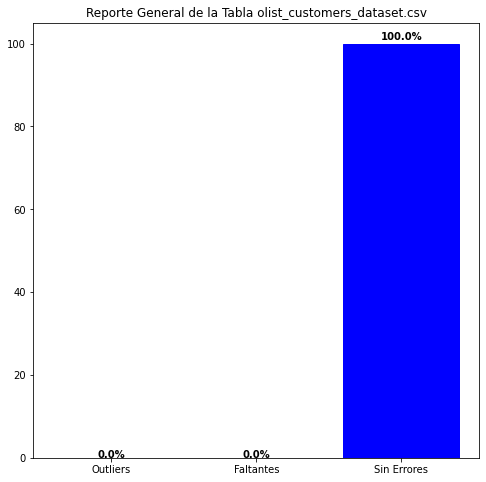

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 100.0
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


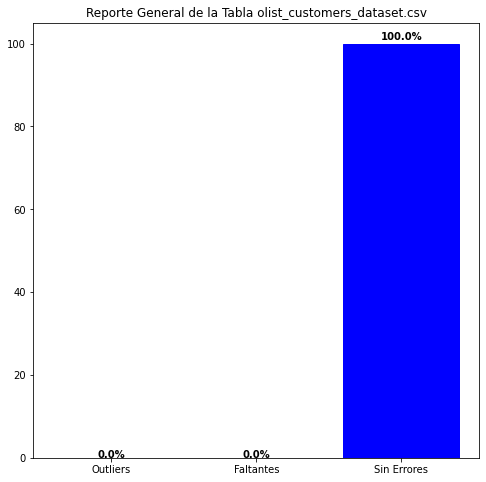

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 100.0
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Trabajando el archivo:  olist_geolocation_dataset.csv
Reporte de calidad de datos: 


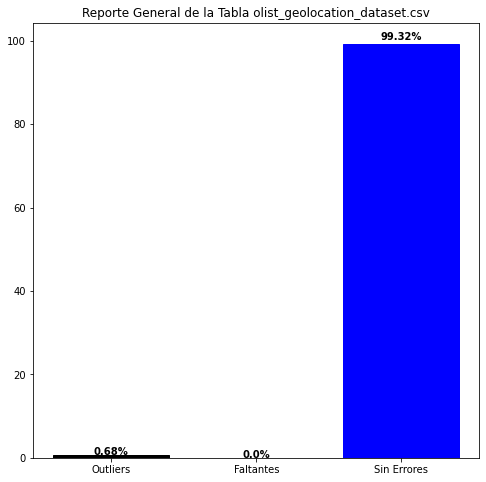

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 99.32
El porcentaje de outliers para la tabla es de: 0.68
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


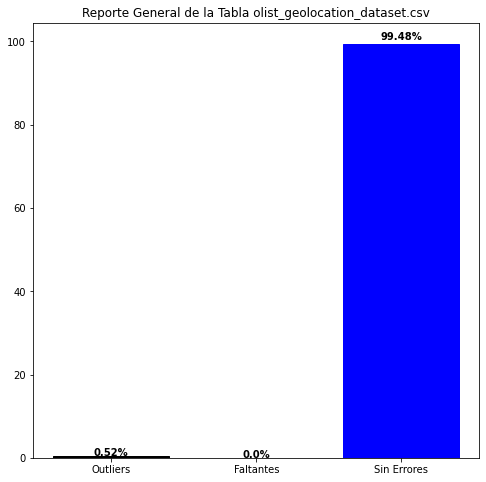

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 99.48
El porcentaje de outliers para la tabla es de: 0.52
---------------------------------------------------------------------------------
Trabajando el archivo:  olist_marketing_qualified_leads_dataset.csv
Reporte de calidad de datos: 


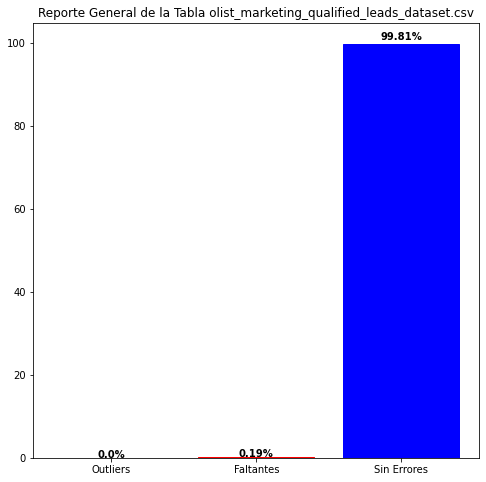

El porcentaje de valores faltantes para la tabla es de: 0.19
El porcentaje de valores sin errores para la tabla es de: 99.81
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


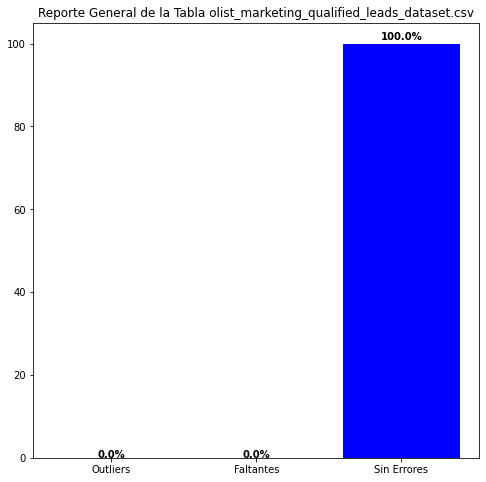

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 100.0
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Trabajando el archivo:  olist_orders_dataset.csv
Reporte de calidad de datos: 


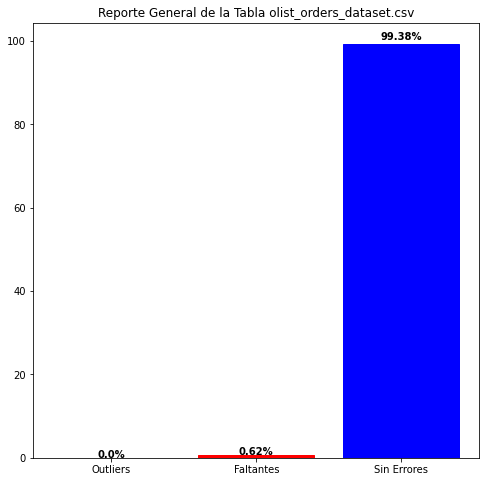

El porcentaje de valores faltantes para la tabla es de: 0.62
El porcentaje de valores sin errores para la tabla es de: 99.38
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


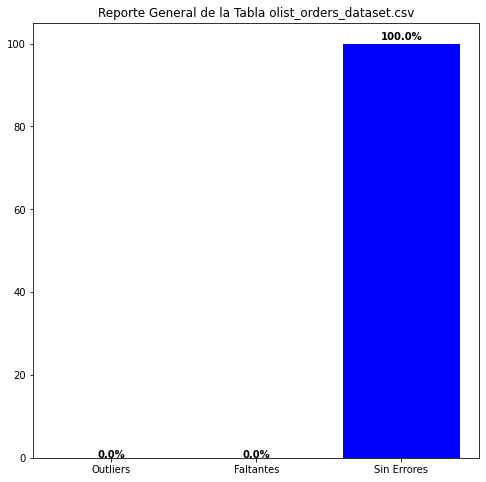

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 100.0
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Trabajando el archivo:  olist_order_items_dataset.csv
Reporte de calidad de datos: 


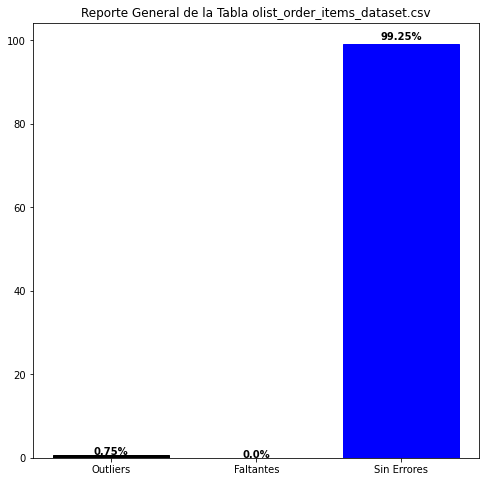

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 99.25
El porcentaje de outliers para la tabla es de: 0.75
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


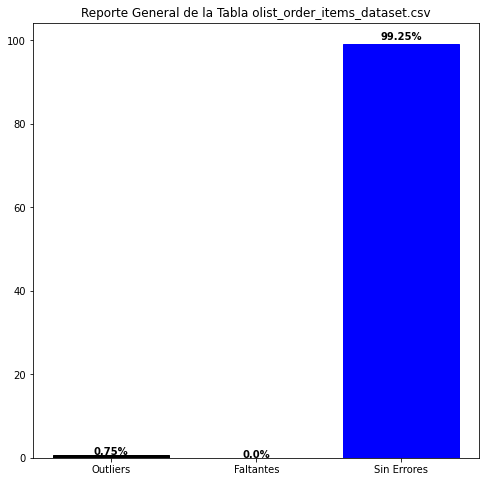

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 99.25
El porcentaje de outliers para la tabla es de: 0.75
---------------------------------------------------------------------------------
Trabajando el archivo:  olist_order_payments_dataset.csv
Reporte de calidad de datos: 


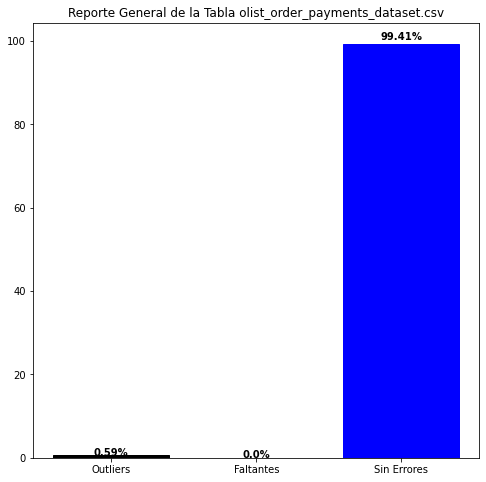

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 99.41
El porcentaje de outliers para la tabla es de: 0.59
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


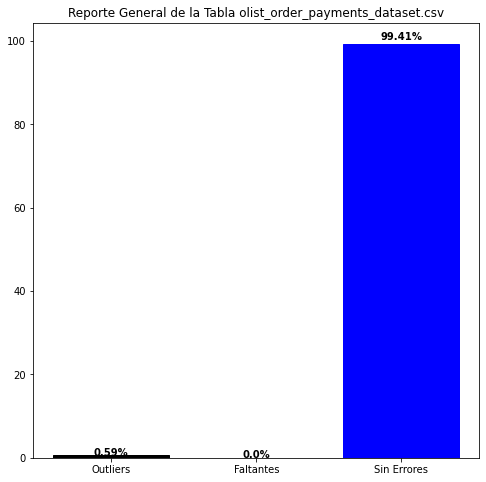

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 99.41
El porcentaje de outliers para la tabla es de: 0.59
---------------------------------------------------------------------------------
Trabajando el archivo:  olist_order_reviews_dataset.csv
Reporte de calidad de datos: 


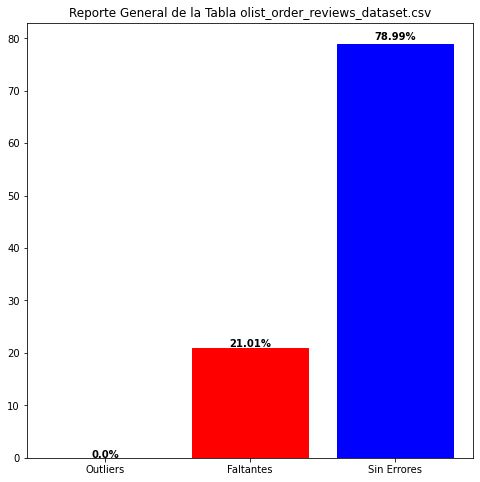

El porcentaje de valores faltantes para la tabla es de: 21.01
El porcentaje de valores sin errores para la tabla es de: 78.99
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


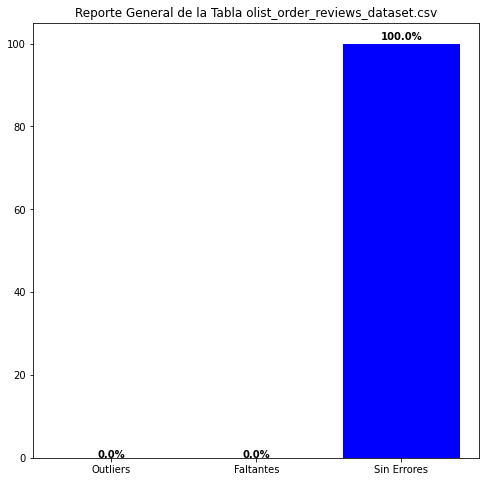

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 100.0
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Trabajando el archivo:  olist_products_dataset.csv
Reporte de calidad de datos: 


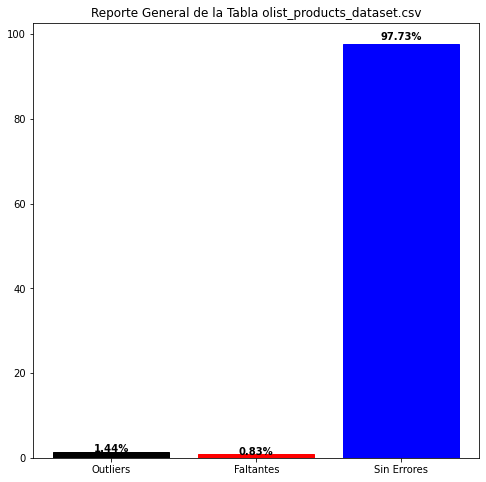

El porcentaje de valores faltantes para la tabla es de: 0.83
El porcentaje de valores sin errores para la tabla es de: 97.73
El porcentaje de outliers para la tabla es de: 1.44
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


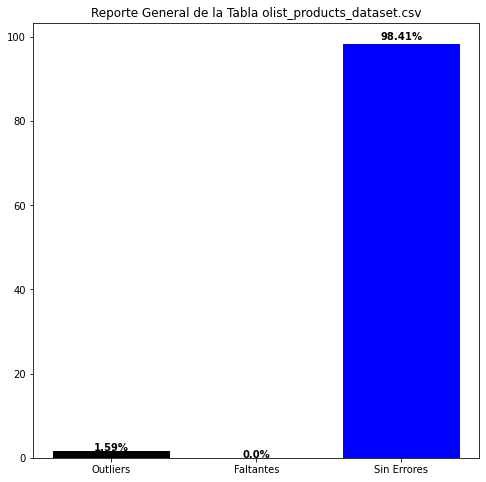

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 98.41
El porcentaje de outliers para la tabla es de: 1.59
---------------------------------------------------------------------------------
Trabajando el archivo:  olist_sellers_dataset.csv
Reporte de calidad de datos: 


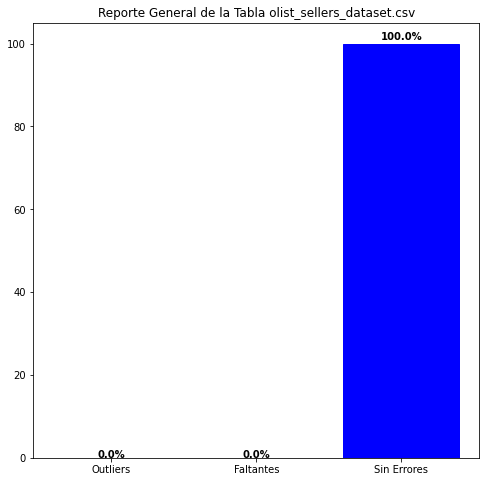

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 100.0
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


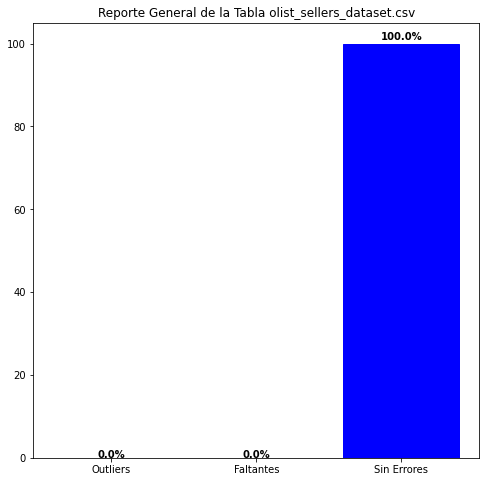

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 100.0
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Trabajando el archivo:  product_category_name_translation_dataset.csv
Reporte de calidad de datos: 


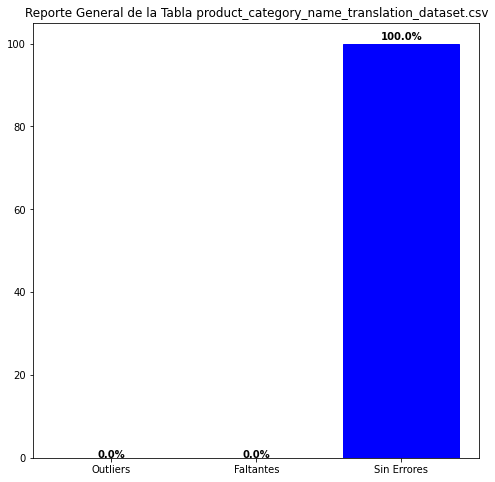

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 100.0
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------
Proceso de ETL realizado!
Este es el nuevo estado de los datos


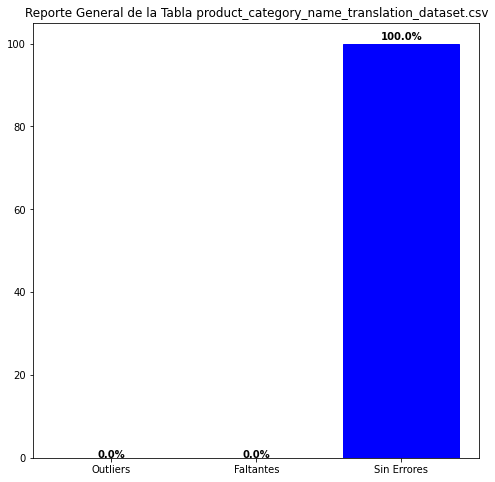

El porcentaje de valores faltantes para la tabla es de: 0.0
El porcentaje de valores sin errores para la tabla es de: 100.0
El porcentaje de outliers para la tabla es de: 0.0
---------------------------------------------------------------------------------


In [50]:
print('Por favor ingrese el directorio de la data que desea trabajar: ')
directorio = str(input())
print('Por favor ingrese el directorio donde desea guardar los nuevos CSVs trabajados: ')
trabajada = str(input())

Export(directorio,trabajada)